In [1]:
import pandas as pd 

import matplotlib.pylab as plt 

In [2]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

df = pd.read_csv(file_path, names = headers)

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As you can see, several question marks appeared in the data frame; those missing values may hinder further analysis.

So, how do we identify all those missing values and deal with them?
How to work with missing data?

Steps for working with missing data:

Identify missing data
Deal with missing data
Correct data format

Identify and handle missing values
Identify missing values
Convert "?" to NaN
In the car data set, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Use the function:
.replace(A, B, inplace = True) 
to replace A by B.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
import numpy as np

df.replace('?',np.nan, inplace =True)

df.head(5)



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
missing_data = df.isnull().sum()   # ✅ 这是一个 Series

for col, missing_count in missing_data.items():
    if missing_count != 0:
        print(f"{col} has {missing_count} missing values")

normalized-losses has 41 missing values
num-of-doors has 2 missing values
bore has 4 missing values
stroke has 4 missing values
horsepower has 2 missing values
peak-rpm has 2 missing values
price has 4 missing values


Deal with missing data
How should you deal with missing data?

Drop data
a. Drop the whole row
b. Drop the whole column
Replace data
a. Replace it by mean
b. Replace it by frequency
c. Replace it based on other functions

Replace by mean:

"normalized-losses": 41 missing data, replace them with mean
"stroke": 4 missing data, replace them with mean
"bore": 4 missing data, replace them with mean
"horsepower": 2 missing data, replace them with mean
"peak-rpm": 2 missing data, replace them with mean

Replace by frequency:

"num-of-doors": 2 missing data, replace them with "four".
Reason: 84% sedans are four doors. Since four doors is most frequent, it is most likely to occur
Drop the whole row:

"price": 4 missing data, simply delete the whole row
Reason: You want to predict price. You cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to you.

Calculate the mean value for the "normalized-losses" column 

In [9]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)
df["normalized-losses"] = df["normalized-losses"].replace(np.nan, avg_norm_loss)

Average of normalized-losses: 122.0


Calculate the mean value for the "bore" column

In [10]:
avg_bore = df['bore'].astype('float').mean()

avg_bore

df['bore'] = df['bore'].fillna(avg_bore)

In [11]:
avg_bore

np.float64(3.3297512437810943)

In [12]:
avg_stoke = df['stroke'].astype('float').mean()

avg_stoke
df['stroke']=df['stroke'].replace(np.nan,avg_stoke)


In [ ]:
79
for i,x in missing.items():
    if x !=0:
        print(f'{i}has nan:{x}')

num-of-doorshas nan:2
horsepowerhas nan:2
peak-rpmhas nan:2
pricehas nan:4


Calculate the mean value for the "horsepower" column¶

In [39]:
avg_horsepower = df['horsepower'].astype('float').mean()
df['horsepower'].replace(np.nan, avg_horsepower)

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 201, dtype: object

In [15]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm)

0      5000
1      5000
2      5000
3      5500
4      5500
       ... 
200    5400
201    5300
202    5500
203    4800
204    5400
Name: peak-rpm, Length: 205, dtype: object

To see which values are present in a particular column, we can use the ".value_counts()" method:

In [16]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

In [20]:
df['make'].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: count, dtype: int64

You can see that four doors is the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:

In [17]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [22]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four")

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object

In [24]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [37]:
df = df.dropna(subset=['price'])

In [40]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [41]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [46]:
df.loc[:, ["bore", "stroke"]] = df.loc[:, ["bore", "stroke"]].astype("float")
df.loc[:,["normalized-losses"]] = df.loc[:,["normalized-losses"]].astype("int")
df.loc[:,["price"]] = df.loc[:,["price"]].astype("float")
df.loc[:,["peak-rpm"]] = df.loc[:,["peak-rpm"]].astype("float")

In [47]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [48]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [59]:

df.loc[:,'city-L/100km'] = 235 / df.loc[:,'city-mpg']

df.loc[:,['city-mpg','city-L/100km']]

,city-mpg,city-L/100km
0,21,11.190476
1,21,11.190476
2,19,12.368421
3,24,9.791667
4,18,13.055556
...,...,...
200,23,10.217391
201,19,12.368421
202,18,13.055556
203,26,9.038462


Data Normalization
Why normalization?

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include

scaling the variable so the variable average is 0
scaling the variable so the variance is 1
scaling the variable so the variable values range from 0 to 1
Example

To demonstrate normalization, say you want to scale the columns "length", "width" and "height".

Target: normalize those variables so their value ranges from 0 to 1

Approach: replace the original value by (original value)/(maximum value)

In [64]:
# replace (original value) by (original value)/(maximum value)
df.loc[:,'length'] = df.loc[:,'length']/df.loc[:,'length'].max()
df.loc[:,'width'] = df.loc[:,'width']/df.loc[:,'width'].max()


In [65]:
df.loc[:,'height'] = df.loc[:,'height']/df.loc[:,'height'].max()

In [66]:
# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [69]:
df = df.dropna(subset = 'horsepower')

In [71]:
df.loc[:,"horsepower"]=df.loc[:,"horsepower"].astype(int, copy=True)

Find 3 bins of equal size bandwidth by using Numpy's linspace(start_value, end_value, numbers_generated function.

Since you want to include the minimum value of horsepower, set start_value = min(df["horsepower"]).

Since you want to include the maximum value of horsepower, set end_value = max(df["horsepower"]).

Since you are building 3 bins of equal length, you need 4 dividers, so numbers_generated = 4.

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

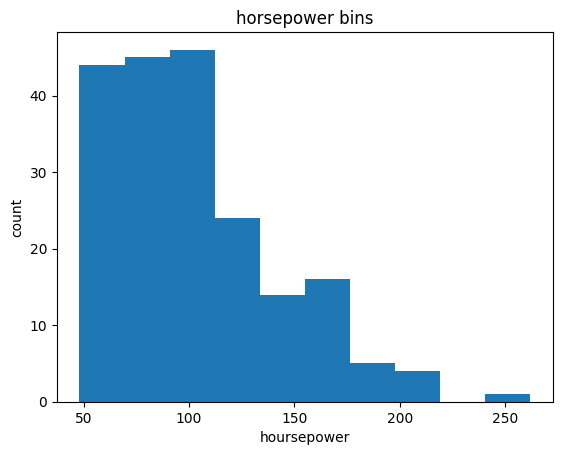

In [76]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df['horsepower'])
plt.pyplot.xlabel('hoursepower')
plt.pyplot.ylabel('count')
plt.pyplot.title("horsepower bins")

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

In [79]:
group_names = ['Low', 'Medium', 'High']

In [84]:
df.loc[:,'horsepower-binned'] = pd.cut(df['horsepower'],bins,labels=group_names)



C:\Users\Tengkai\AppData\Local\Temp\ipykernel_63540\3779889198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'horsepower-binned'] = pd.cut(df['horsepower'],bins,labels=group_names)


Text(0.5, 1.0, 'horsepower bins')

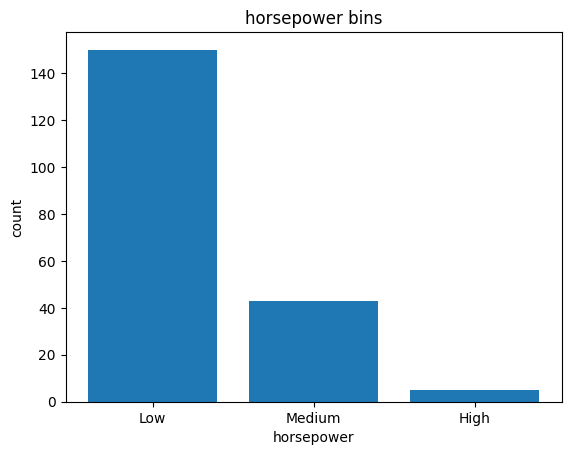

In [85]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Bins Visualization

Text(0.5, 1.0, 'horsepower bins')

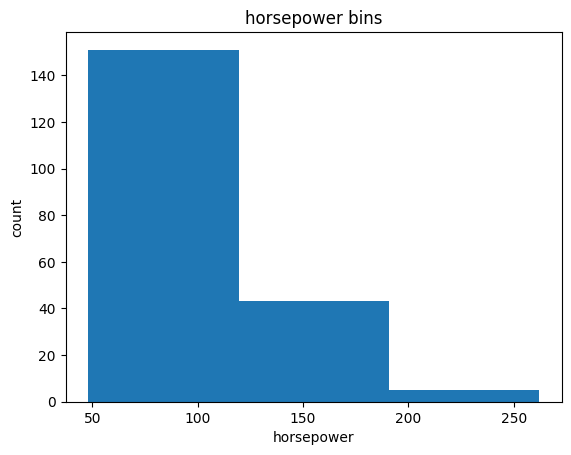

In [86]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Indicator Variable
What is an indicator variable?

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

Why use indicator variables?

You use indicator variables so you can use categorical variables for regression analysis in the later modules.

Example
The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, you can convert "fuel-type" to indicator variables.

Use the Panda method 'get_dummies' to assign numerical values to different categories of fuel type.

In [87]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'hight', 'hoursepower——binned',
       'horsepower-binned'],
      dtype='object')

In [ ]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [92]:
dummy_variable_1.rename(columns = {'gas':'fuel-type-gas','diesel':'fuel-type-diesel'})

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
200,False,True
201,False,True
202,False,True
203,True,False


In the data frame, column 'fuel-type' now has values for 'gas' and 'diesel' as 0s and 1s.
concat 是 拼接/合并 DataFrame 或 Series 的方法。
pd.concat(objs, axis=0, join="outer", ignore_index=False)
它的核心功能：把多个表格上下拼接（行拼接）或左右拼接（列拼接）
axis=0 → 按行拼接（纵向叠加，默认）

axis=1 → 按列拼接（横向并排）

In [98]:
df = pd.concat([df,dummy_variable_1],axis=1)
df = df.drop('fuel-type',axis = 1)
df



,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,diesel,gas,diesel,gas,diesel,gas,diesel,gas,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,False,True,False,True,False,True,False,True,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,False,True,False,True,False,True,False,True,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,False,True,False,True,False,True,False,True,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,False,True,False,True,False,True,False,True,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,False,True,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,False,True,False,True,False,True,False,True,False,True
201,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,False,True,False,True,False,True,False,True,False,True
202,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,False,True,False,True,False,True,False,True,False,True
203,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,True,False,True,False,True,False,True,False,True,False


Question #4: 
Similar to before, create an indicator variable for the column "aspiration"

In [ ]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])

dummy_variable_2.rename(columns = {'std':'aspiration-sid','turbo':'aspiration-turbo'})




,aspiration-sid,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
200,True,False
201,False,True
202,True,False
203,False,True


In [108]:
df = pd.concat([df,dummy_variable_2],axis =1)
df.drop('aspiration',axis =1)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,diesel,gas,diesel,gas,std,turbo,std,turbo,std,turbo
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,False,True,False,True,True,False,True,False,True,False
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,False,True,False,True,True,False,True,False,True,False
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,False,True,False,True,True,False,True,False,True,False
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,False,True,False,True,True,False,True,False,True,False
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,False,True,False,True,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,False,True,False,True,True,False,True,False,True,False
201,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,False,True,False,True,False,True,False,True,False,True
202,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,False,True,False,True,True,False,True,False,True,False
203,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,True,False,True,False,False,True,False,True,False,True


In [109]:
df.to_csv(r'C:\Users\Tengkai\Desktop\VS CODE\clean_df.csv')